<h1 style="color: #3636ff;">Линейная алгебра. Практическая работа №8</h1>

### Программные средства

[LaTeX. Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[Sage. Linear Algebra](http://doc.sagemath.org/html/en/tutorial/tour_linalg.html)

[Numpy. Quickstart tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html#linear-algebra)



### Конспекты лекций

[АЛГЕБРА И ГЕОМЕТРИЯ ДЛЯ СТУДЕНТОВ-ФИЗИКОВ](http://math.phys.msu.ru/data/24/Algebra_and_geometry.pdf)

[Прямые и плоскости](http://hoster.bmstu.ru/~fn1/wp-content/uploads/2012/10/uchebno-metod/Surf_and_lines_ST_metod.pdf)

[Computational Mathematics with SageMath](http://dl.lateralis.org/public/sagebook/sagebook-ba6596d.pdf)

[Introduction to Symbolic Computation](http://homepages.math.uic.edu/~jan/mcs320/mcs320.pdf)

# Прямые

## 1. Уравнение прямой на плоскости.

Общий вид

$l: \ a * x + b * y + c = 0$

$\overrightarrow{n}\{a;b\} \perp l$

Проходящей через две точки $(x_1;y_1), (x_2;y_2)$

$\frac{x - x_1}{x_2 - x_1} = \frac{y - y_1}{y_2 - y_1}$

С угловым коэффициентом $k$ и проходящая через точку $(x_0;y_0)$

$y - y_0 = k * (x - x_0)$

$k = tg \ \alpha$ - тангенс угла наклона прямой к оси х.

$k = -\frac{a}{b} = \frac{y_2 - y_1}{x_2 - x_1}$

Параметрические

$\begin {cases} 
x = x_0 + p * t \\
y = y_0 + q * t
\end {cases}, t \in \mathbb{R}$

Каноническое

$\frac{x - x_0}{p} = \frac{y - y_0}{q}$

$\overrightarrow{l}\{p;q\} \parallel l, \ M_0(x_0;y_0) \in l$

В отрезках

$\frac{x}{\alpha} + \frac{y}{\beta} = 1$

$\alpha = -\frac{c}{a}, \beta = -\frac{c}{b}$

In [261]:
# numpy
X = numpy.linspace(start=-10, stop=10, num=20)
T = numpy.linspace(start=-5, stop=5, num=20)
X

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

In [262]:
def line1(a, b, c, x):
    return -(a * x + c) / b
def line2(k, x0, y0, x):
    return k * (x - x0) + y0
def line3(x1, y1, x2, y2, x):
    return (y2 - y1) * (x - x1) / (x2 - x1) + y1
def line4(x0, y0, p, q, t):
    return(x0 + p * t, y0 + q * t)

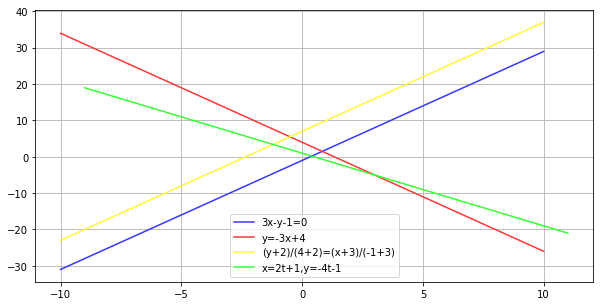

In [284]:
import pylab as plt
plt.figure(figsize=(10, 5))
plt.plot(X, line1(3, -1, -1, X), color='#3636ff', label='3x-y-1=0')
plt.plot(X, line2(-3, 1, 1, X), color='#ff3636', label='y=-3x+4')
plt.plot(X, line3(-3, -2, -1, 4, X), color='#ffff36', label='(y+2)/(4+2)=(x+3)/(-1+3)')
plt.plot(line4(1, -1, 2, -4, T)[0], line4(1, -1, 2, -4, T)[1], 
         color='#36ff36', label='x=2t+1,y=-4t-1')
plt.grid(); plt.legend(loc=8)
plt.show()

In [296]:
%%r
line1 <- function(a, b, c, x){-(a * x + c) / b}
line2 <- function(k, x0, y0, x){k * (x - x0) + y0}
line3 <- function(x1, y1, x2, y2, x){(y2 - y1) * (x - x1) / (x2 - x1) + y1}
line4 <- function(x0, y0, p, q, t){c(x0 + p * t, y0 + q * t)}

X <- seq(from=-10, to=11, by=1)
print(X)
print(line1(3, -1, -1, X))
print(line2(-3, 1, 1, X))
print(line3(-3, -2, -1, 4, X))






 [1] -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11
 [1] -31 -28 -25 -22 -19 -16 -13 -10  -7  -4  -1   2   5   8  11  14  17  20  23  26  29  32
 [1]  34  31  28  25  22  19  16  13  10   7   4   1  -2  -5  -8 -11 -14 -17 -20 -23 -26 -29
 [1] -23 -20 -17 -14 -11  -8  -5  -2   1   4   7  10  13  16  19  22  25  28  31  34  37  40


In [118]:
# sage
x,y,x0,y0,x1,y1,x2,y2,k,a,b,c,p,q,t = var('x,y,x0,y0,x1,y1,x2,y2,k,a,b,c,p,q,t')
eq1 = a * x + b * y + c == 0
eq2 = y - y0  == k * (x - x0)
eq3 = (y - y1) / (y2 - y1) == (x - x1) / (x2 - x1)
eq4 = x == x0 + p * t
eq5 = y == y0 + q * t

In [50]:
solve([eq1, a==3, b==-1, c==-1], a, b, c, x, y)

[[a == 3, b == -1, c == -1, x == r26, y == 3*r26 - 1]]

In [112]:
solve([eq2, k==-3, x0==1, y0==1], k,x0,y0,x,y)

[[k == -3, x0 == 1, y0 == 1, x == r27, y == -3*r27 + 4]]

In [116]:
solve([eq3, x1==-3, y1==-2, x2==-1, y2==4], x1,y1,x2,y2,x,y)

[[x1 == -3, y1 == -2, x2 == -1, y2 == 4, x == r31, y == 3*r31 + 7]]

In [124]:
solve([eq4, eq5, x0==1, y0==-1, p==2, q==-4], x0,y0,p,q,t,x,y)

[[x0 == 1, y0 == -1, p == 2, q == -4, t == r33, x == 2*r33 + 1, y == -4*r33 - 1]]

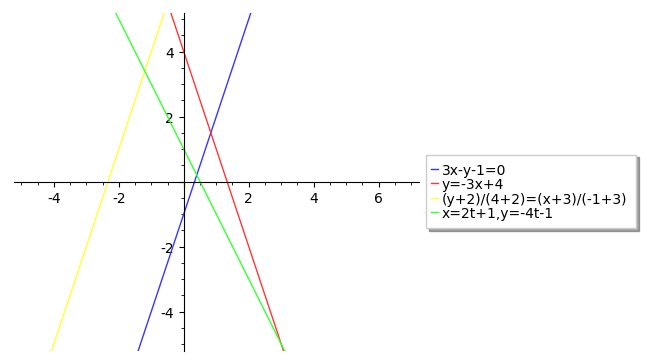

In [125]:
g = Graphics()
l1 = plot(3*x-1, (x,-5,5), ymax=5, ymin=-5, 
          color='#3636ff', legend_label='3x-y-1=0')
l2 = plot(-3*x+4, (x,-5,5), 
          color='#ff3636', legend_label='y=-3x+4')
l3 = plot(3*x+7, (x,-5,5),
         color='#ffff36', legend_label='(y+2)/(4+2)=(x+3)/(-1+3)')
l4 = parametric_plot((2*t+1,-4*t-1), (t,-3,3), 
                     color='#36ff36', legend_label='x=2t+1,y=-4t-1')
g = g+l1+l2+l3+l4
g.set_legend_options(bbox_to_anchor=(1.0,0.6)) 
g.show()

In [247]:
# sympy
import sympy
sympy.init_printing(use_unicode=True)
a,b,c,x,y = sympy.symbols('a b c x y')
sympy.solve([a*x+b*y+c,a-3,b+1,c+1], a,b,c,y)

In [248]:
x0,y0,k = sympy.symbols('x0 y0 k')
sympy.solve([y-y0-k*(x-x0),x0-1,y0-1,k+3], x0,y0,k,y)

In [249]:
x1,y1,x2,y2 = sympy.symbols('x1 y1 x2 y2')
sympy.solve([(y-y1)/(y2-y1)-(x-x1)/(x2-x1),x1+3,y1+2,x2+1,y2-4], x1,y1,x2,y2,y)

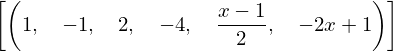

In [255]:
p,q,t = sympy.symbols('p q t')
sympy.solve([x-x0-p*t,y-y0-q*t,x0-1,y0+1,p-2,q+4], x0,y0,p,q,t,y)

## 2. Взаимное расположение точек и прямых на плоскости.

Расстояние между прямой и точкой

$\begin {cases}
l: a * x + b * y + c = 0 \\
M: (x_0;y_0) 
\end {cases} \to \rho(M,l) = \frac{|a * x_0 + b * y_0 + c|}{\sqrt{a^2 + b^2}}$

Две прямые

$\begin {cases}
l_1: y = k_1 * x + m_1 = 0 \\
l_2: y = k_2 * x + m_2 = 0
\end {cases}$

$k_1 = k_2, m_1 = m_2 \implies l_1 \equiv l_2 \\
k_1 = k_2, m_1 \neq m_2 \implies l_1 \parallel l_2 \\
k_1 \neq k_2 \implies l_1 \cap l_2 = O \\
tg \ \varphi = \bigg|\frac{k_1 - k_2}{1 + k_1 \cdot k_2}\bigg| \\
k_1 \cdot k_2 = -1 \implies l_1 \perp l_2 \\ $

In [225]:
# numpy
import numpy
# l1: 2x+3y-5=0
# l2: -3x-4y+7=0
a = numpy.matrix([[2,3],[-3,-4]])
b = numpy.matrix([5,-7])
numpy.linalg.solve(a,b.T)

matrix([[ 1.],
        [ 1.]])

In [256]:
%%r
# l1: 2x+3y-5=0
# l2: -3x-4y+7=0
a <- matrix(data=c(2,3,-3,-4), 
            nrow=2, ncol=2, byrow=TRUE)    
b <- matrix(data=c(5,-7), 
            nrow=2, ncol=1, byrow=FALSE)
round(solve(a, b))







     [,1]
[1,]    1
[2,]    1


In [131]:
%%latex
$l_1: 11 * x + 2 * y - 7 = 0 \\
l_2: 2 * x - y + 3 = 0 \\
m_1, m_2: \rho(M,l_1) = \rho(M,l_2), \ \forall M \in m_1, m2 \\
m_1, m_2: \ ?$

<IPython.core.display.Latex object>

In [135]:
# sage
eq1 = 11 * x + 2 * y - 7 == 0
eq2 = 2 * x - y + 3 == 0
solve(eq1, y, x), solve(eq2, y, x)

([[y == -11/2*r36 + 7/2, x == r36]], [[y == 2*r37 + 3, x == r37]])

In [175]:
%%latex
$\rho(M,l_1) = \rho(M,l_2) \iff 
\frac{|11 * x + 2 * y - 7|}{\sqrt{11^2 + 2^2}} = \frac{|2 * x - y + 3|}{\sqrt{2^2 + (-1)^2}}$

<IPython.core.display.Latex object>

In [162]:
eq3 = (11 * x + 2 * y - 7) / sqrt(11^2 + 2^2) == (2 * x - y + 3) / sqrt(2^2 + (-1)^2)
eq4 = (11 * x + 2 * y - 7) / sqrt(11^2 + 2^2) == -1 * (2 * x - y + 3) / sqrt(2^2 + (-1)^2)
solve(eq3, y, x), solve(eq4, y, x)

([[y == -1/7*r58 + 22/7, x == r58]], [[y == 7*r59 + 8/3, x == r59]])

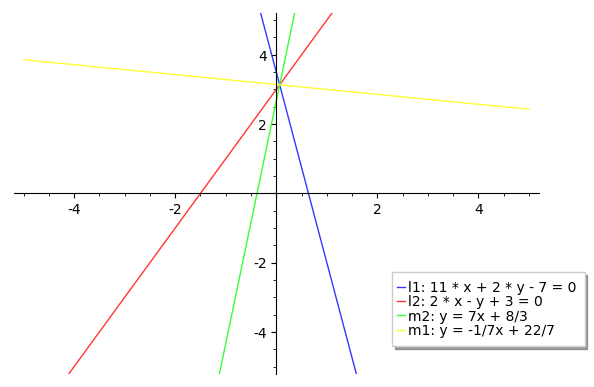

In [173]:
g = Graphics()
l1 = plot(-11/2*x+7/2, (x,-5,5), ymax=5, ymin=-5, 
          color='#3636ff', legend_label='l1: 11 * x + 2 * y - 7 = 0')
l2 = plot(2*x+3, (x,-5,5), 
          color='#ff3636', legend_label='l2: 2 * x - y + 3 = 0')
m1 = plot(-1/7*x+22/7, (x,-5,5),
          color='#ffff36', legend_label='m1: y = -1/7x + 22/7')
m2 = plot(7*x+8/3, (x,-5,5), 
          color='#36ff36', legend_label='m2: y = 7x + 8/3')
g = g+l1+l2+m2+m1
g.set_legend_options(bbox_to_anchor=(1.1,0.3)) 
g.show()

## 3. Прямые в пространстве.

Общие уравнения (пересечение плоскостей)

$l: \begin {cases}
a_1x + b_1y + c_1z + d_1 = 0 \\
a_2x + b_2y + c_2z + d_2 = 0
\end {cases}$

$\overrightarrow{n}\{a;b;c\} \perp l$

Проходящей через две точки $(x_1;y_1;z_1), (x_2;y_2;z_2)$

$\frac{x - x_1}{x_2 - x_1} = \frac{y - y_1}{y_2 - y_1} = \frac{z - z_1}{z_2 - z_1}$

Параметрические

$\begin {cases} 
x = x_0 + p * t \\
y = y_0 + q * t \\
z = z_0 + r * t
\end {cases}, t \in \mathbb{R}$

Канонические

$\frac{x - x_0}{p} = \frac{y - y_0}{q} = \frac{z - z_0}{r}$

$\overrightarrow{l}\{p;q;r\} \parallel l, \ M_0(x_0;y_0;z_0) \in l$

In [178]:
%%latex
$A(2;5;3), B(3;2;1), C(4;1;2) \in \pi \\
D(1;4;4), E(0;6;7)\in l \\
O(x;y;z) = \pi \cap l \\
(x;y;z) = ?$

<IPython.core.display.Latex object>

In [190]:
# sage
x,y,z,t = var('x,y,z,t')
x1,y1,z1 = 2,5,3 # A
x2,y2,z2 = 3,2,1 # B
x3,y3,z3 = 4,1,2 # C
x4,y4,z4 = 1,4,4 # D
x5,y5,z5 = 0,6,7 # E

# π
P = Matrix(SR, 3, [x-x1, y-y1, z-z1, x2-x1, y2-y1, z2-z1, x3-x1, y3-y1, z3-z1])
eq0 = P.det()==0
# l
eq1 = x==x4+(x5-x4)*t
eq2 = y==y4+(y5-y4)*t
eq3 = z==z4+(z5-z4)*t

print(P)
eq0, eq1, eq2, eq3

[x - 2 y - 5 z - 3]
[    1    -3    -2]
[    2    -4    -1]


(-5*x - 3*y + 2*z + 19 == 0, x == -t + 1, y == 2*t + 4, z == 3*t + 4)

In [191]:
solve([eq0,eq1,eq2,eq3],x,y,z,t)

[[x == 3, y == 0, z == -2, t == -2]]

## 4. Взаимное расположение точек и прямых в пространстве.

Расстояние между прямой $l$ и точкой $M(x_1;y_1;z_1)$

$\Delta_x = \begin {vmatrix} q & r \\ y_1-y_0 & z_1-z_0 \end {vmatrix}, \
\Delta_y = \begin {vmatrix} p & r \\ x_1-x_0 & z_1-z_0 \end {vmatrix}, \
\Delta_z = \begin {vmatrix} p & q \\ x_1-x_0 & y_1-y_0 \end {vmatrix} \\
\rho(M,l) = \frac{\sqrt{\Delta_x^2 + \Delta_y^2 + \Delta_z^2}}{\sqrt{p^2 + q^2 + r^2}}$ 

Две прямые

$l_1: \frac{x - x_1}{p_1} = \frac{y - y_1}{q_1} = \frac{z - z_1}{r_1} \\
A_1(x_1;y_1;z_1) \in l_1, \ \overrightarrow{s_1}\{p_1;q_1;r_1\} \parallel l_1 \\
l_2: \frac{x - x_2}{p_2} = \frac{y - y_2}{q_2} = \frac{z - z_2}{r_2} \\
A_2(x_2;y_2;z_2) \in l_2, \ \overrightarrow{s_2}\{p_2;q_2;r_2\} \parallel l_2$

$\overrightarrow{A_1A_2} = k_1 * \overrightarrow{s_1} = k_2 * \overrightarrow{s_2} \ 
(\overrightarrow{A_1A_2} \parallel \overrightarrow{s_1} \parallel \overrightarrow{s_2}) 
\implies l_1 \equiv l_2 \\
\overrightarrow{A_1A_2} \neq k_1 * \overrightarrow{s_1} = k_2 * \overrightarrow{s_2} \ 
(\overrightarrow{A_1A_2} \nparallel \overrightarrow{s_1} \parallel \overrightarrow{s_2}) \implies l_1 \parallel l_2 \\
\begin{vmatrix}
x_2-x_1 & y_2-y_1 & z_2-z_1 \\
p_1 & q_1 & r_1 \\
p_2 & q_2 & r_2
\end {vmatrix} = 0, \ \overrightarrow{s_1} \neq k * \overrightarrow{s_2} 
\implies l_1 \cap l_2 = O \\
\begin{vmatrix}
x_2-x_1 & y_2-y_1 & z_2-z_1 \\
p_1 & q_1 & r_1 \\
p_2 & q_2 & r_2
\end {vmatrix} \neq 0
\implies l_1, l_2 \notin \pi$

Расстояние между скрещивающимися прямыми

$\Delta = \begin{vmatrix}
x_2-x_1 & y_2-y_1 & z_2-z_1 \\ p_1 & q_1 & r_1 \\ p_2 & q_2 & r_2
\end {vmatrix}, \
\Delta_x = \begin {vmatrix} q_1 & r_1 \\ q_2 & r_2 \end {vmatrix}, \
\Delta_y = \begin {vmatrix} p_1 & r_1 \\ p_2 & r_2 \end {vmatrix}, \
\Delta_z = \begin {vmatrix} p_1 & q_1 \\ p_2 & q_2 \end {vmatrix}$

$\rho(l_1,l_2) = \frac{|\Delta|}{\sqrt{\Delta_x^2 + \Delta_y^2 + \Delta_z^2}}$

Угол между прямыми

$cos \angle (l_1, l_2) = \frac{p_1p_2 + q_1q_2 + r_1r_2}{\sqrt{p_1^2 + q_1^2 + r_1^2}\sqrt{p_2^2 + q_2^2 + r_2^2}}$

In [202]:
%%latex
$l_1 : \frac{x - 4}{-3} = \frac{y - 2}{-1} = \frac{z + 1}{1} \\
l_2 : \frac{x + 1}{2} = \frac{y - 5}{3} = \frac{z - 10}{4} \\
l_1 \cap l_2 = O(x_0;y_0;z_0) \\ 
l_1, \ l_2 \in \pi \\
(x_0;y_0;z_0) = ?, \ \pi: ?$

<IPython.core.display.Latex object>

In [204]:
# sage 
x,y,z,t,i,j,k = var('x,y,z,t,i,j,k')
x1,y1,z1 = 4,2,-1 # A1
x2,y2,z2 = -1,5,10 # A2
p1,q1,r1 = -3,-1,1 # s1
p2,q2,r2 = 2,3,4 # s2

# l1
eq11 = (x-x1)/p1==(y-y1)/q1
eq12 = (z-z1)/r1==(y-y1)/q1
# l2
eq21 = (x-x2)/p2==(y-y2)/q2
eq22 = (z-z2)/r2==(y-y2)/q2

# l1 ∩ l2
solve([eq11, eq12, eq21, eq22], x, y, z)

[[x == -5, y == -1, z == 2]]

In [207]:
# O = l1 ∩ l2, O ∈ π
x0,y0,z0 = -5,-1,2

# n = s1 x s2, n ⊥ π
n = Matrix(SR, 3, [i, j, k, p1, q1, r1, p2, q2, r2]).det()
n

-7*i + 14*j - 7*k

In [223]:
# π 
nx,ny,nz = -7,14,-7
(nx * (x - x0) + ny * (y - y0) + nz * (z - z0) == 0) / (-7) 

x - 2*y + z + 1 == 0